In [39]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

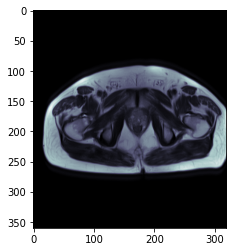

In [57]:
filePath = 'PROSTATA_1.MR.0001.0015.2021.12.22.13.14.21.169473.39474333.ima'
#img = pydicom.read_file(filePath)
img = pydicom.dcmread(filePath)
plt.imshow(img.pixel_array,cmap=plt.cm.bone)
plt.show()


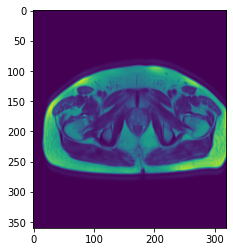

In [25]:
plt.imshow(img.pixel_array)

In [125]:
from skimage import io,viewer,exposure
from skimage.viewer.plugins.lineprofile import LineProfile
from skimage.viewer.plugins import Plugin
from skimage.viewer.widgets import Slider


img = io.imread(filePath,as_gray=True)
img.shape
img = exposure.rescale_intensity(img,in_range="image",out_range=(0,1))
viewer = viewer.ImageViewer(img)
viewer+=LineProfile(maxdist=100)
viewer.show()[0]

C:\Users\Pier\AppData\Local\Temp/ipykernel_7108/3755563780.py:10: FutureWarning: `viewer` is deprecated and will be removed in 0.20. For alternatives, refer to https://scikit-image.org/docs/stable/user_guide/visualization.html
  viewer = viewer.ImageViewer(img)


Line profile tool
+ and - keys or mouse scroll changes width of scan line.
Select and drag ends of the scan line to adjust it.


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([0.07773611, 0.07603137, 0.06716672, 0.07330378, 0.06955336,
        0.06614388, 0.06784862, 0.07364473, 0.07193999, 0.08796454,
        0.0941016 , 0.09955677, 0.10944426, 0.08728265, 0.08966928,
        0.08353222, 0.07603137, 0.0790999 , 0.07466758, 0.08830549,
        0.09717013, 0.08421412, 0.08966928, 0.11387658, 0.11421752,
        0.11864985, 0.13262871, 0.13365155, 0.11148994, 0.1104671 ,
        0.10739857, 0.08660075, 0.07466758, 0.07262189, 0.05762018,
        0.0548926 , 0.05591544, 0.04977838, 0.05114218, 0.05386976,
        0.04602796, 0.05114218, 0.04568701, 0.04636891, 0.1333106 ,
        0.15172179, 0.10739857, 0.10705762, 0.09648824, 0.09614729,
        0.11694511, 0.17865667, 0.16638254, 0.15888169, 0.17490624,
        0.19706785, 0.2021

In [47]:
print(img.pixel_array.shape)
print("max: ",img.pixel_array.max(),"\nmin: ",img.pixel_array.min())
np.mean(img.pixel_array)

(360, 320)
max:  2933 
min:  0


391.69512152777776

In [50]:
np.histogram(img.pixel_array,bins=10)

(array([77203, 11305,  5050,  4414,  5375,  4497,  3932,  2502,   832,
           90], dtype=int64),
 array([   0. ,  293.3,  586.6,  879.9, 1173.2, 1466.5, 1759.8, 2053.1,
        2346.4, 2639.7, 2933. ]))

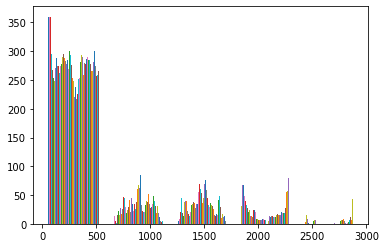

In [54]:
plt.hist(img.pixel_array,bins=5)
plt.show()


In [69]:
from skimage.filters.rank import gradient
from skimage.morphology import disk

C:\Users\Pier\AppData\Local\Temp/ipykernel_7108/3346324377.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out = gradient(img, disk(1))


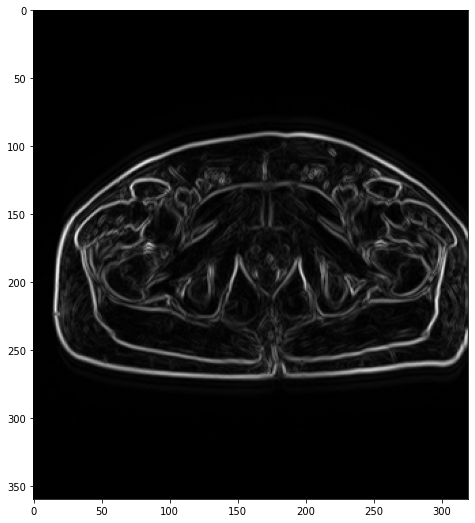

In [127]:
out = gradient(img, disk(1))
io.imsave("bordes.png",out)
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(out,cmap="gray")
